# Football Player Market Value Analysis for Euro 2024

## Introduction


### Dataset Source  (CC0: Public Domain)
https://www.kaggle.com/datasets/damirdizdarevic/uefa-euro-2024-players

### Problem Statement

Football player market value estimation is a complex task influenced by numerous factors such as age, experience, performance, and the club they play for. Accurate valuation is crucial for clubs, agents, and stakeholders for making informed decisions regarding transfers, contracts, and investments. In this analysis, we aim to understand the key factors affecting the market value of football players participating in the Euro 2024 tournament.

### Objective

The objective of this notebook is to analyze and predict the market values of Euro 2024 football players using various features such as age, caps, goals, height, position, and club. By leveraging machine learning models and SHAP (SHapley Additive exPlanations) values, we aim to:
1. Identify the most influential factors contributing to players' market values.
2. Provide a clear understanding of how these factors interact with each other.
3. Offer insights that can assist clubs, scouts, and analysts in making data-driven decisions.

### Methodology

1. **Data Preprocessing:** We preprocess the dataset by handling missing values, scaling numerical features, and encoding categorical variables.
2. **Model Training:** We train a Random Forest Regressor to predict the market values of the players.
3. **Model Evaluation:** The model's performance is evaluated using the R-squared metric.
4. **Feature Importance Analysis:** We use SHAP values to understand the importance of each feature and its impact on the model's predictions.
5. **Visualization:** Various plots such as Actual vs. Predicted values, Residuals plot, and SHAP dependence plots are used to visualize and interpret the results.

### Key Findings

- **Player Valuations:** The analysis highlighted significant discrepancies between the actual market values and the predicted values, especially for very young or very old players, indicating areas where model predictions could be improved.
- **Influential Factors:** Features like age, goals, and caps were found to be significant predictors of market value.
- **SHAP Analysis:** SHAP values provided a detailed understanding of how each feature impacts the predictions, allowing for a nuanced interpretation of the model's output.

### Conclusion

This notebook serves as a comprehensive tool for analyzing the factors affecting football players' market values.


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


file_path = '../Datasets/euro2024_players.csv'
df = pd.read_csv(file_path)
print(df.head())


                    Name     Position  Age                 Club  Height  \
0  Marc-André ter Stegen   Goalkeeper   32         FC Barcelona     187   
1           Manuel Neuer   Goalkeeper   38        Bayern Munich     193   
2         Oliver Baumann   Goalkeeper   34  TSG 1899 Hoffenheim     187   
3     Nico Schlotterbeck  Centre-Back   24    Borussia Dortmund     191   
4           Jonathan Tah  Centre-Back   28  Bayer 04 Leverkusen     195   

    Foot  Caps  Goals  MarketValue  Country  
0  right    40      0     28000000  Germany  
1  right   119      0      4000000  Germany  
2  right     0      0      3000000  Germany  
3   left    12      0     40000000  Germany  
4  right    25      0     30000000  Germany  


In [56]:
len(df)

623

We re interested in understanding the distribution of players' ages in the dataset and how it varies across different positions. This analysis could help in identifying if certain positions tend to have older or younger players.

### Visualizing Age Distribution Across Positions

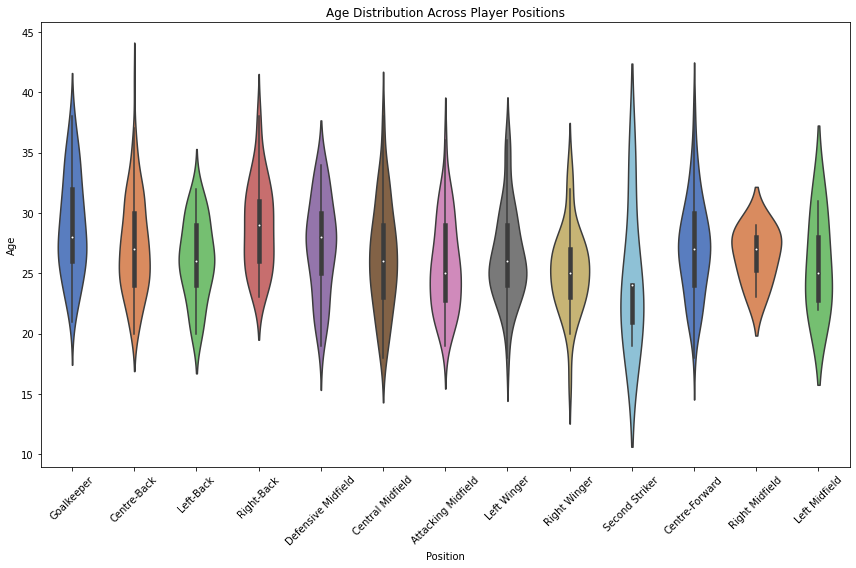

In [6]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Position', y='Age', data=df, palette='muted')
plt.title('Age Distribution Across Player Positions')
plt.xlabel('Position')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

### Calculating the average age by team 

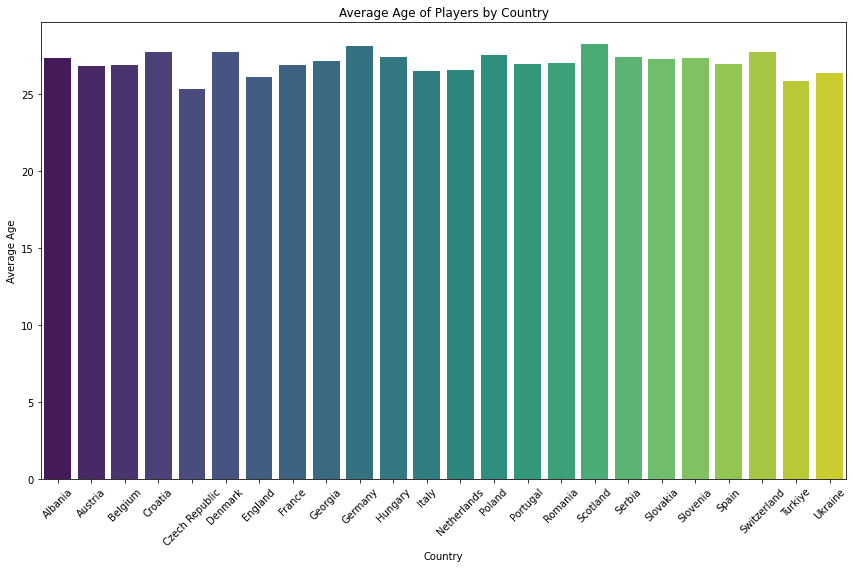

In [7]:

average_age_by_team = df.groupby('Country')['Age'].mean().reset_index()


plt.figure(figsize=(12, 8))
sns.barplot(x='Country', y='Age', data=average_age_by_team, palette='viridis')
plt.title('Average Age of Players by Country')
plt.xlabel('Country')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Visualizing Market Values by Position

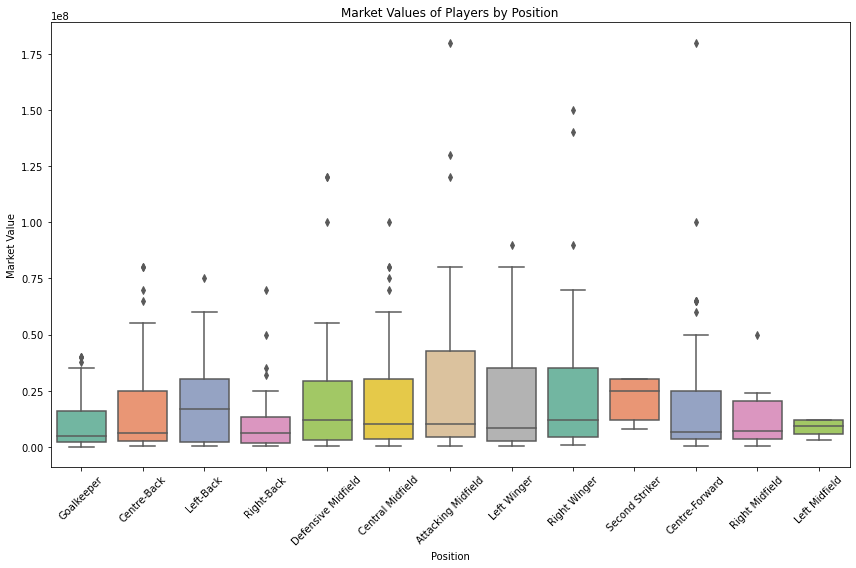

In [10]:

plt.figure(figsize=(12, 8))
sns.boxplot(x='Position', y='MarketValue', data=df, palette='Set2')
plt.title('Market Values of Players by Position')
plt.xlabel('Position')
plt.ylabel('Market Value')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



###  Calcuate Average Market Value by Team


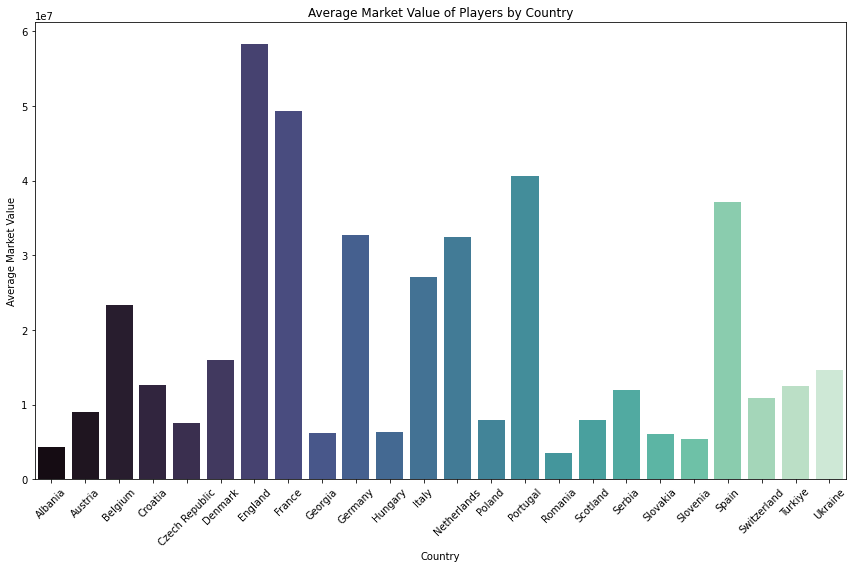

In [11]:
average_market_value_by_team = df.groupby('Country')['MarketValue'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Country', y='MarketValue', data=average_market_value_by_team, palette='mako')
plt.title('Average Market Value of Players by Country')
plt.xlabel('Country')
plt.ylabel('Average Market Value')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


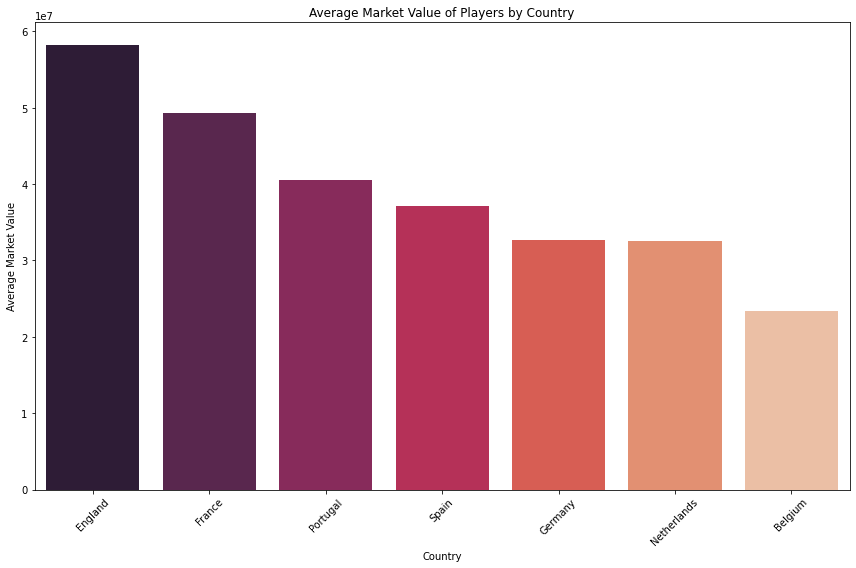

In [14]:

countries_of_interest = ['England', 'France', 'Portugal', 'Spain', 'Germany', 'Netherlands', 'Belgium']
average_market_value_by_country = df.groupby('Country')['MarketValue'].mean().loc[countries_of_interest].reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Country', y='MarketValue', data=average_market_value_by_country, palette='rocket')
plt.title('Average Market Value of Players by Country')
plt.xlabel('Country')
plt.ylabel('Average Market Value')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


- After interpreting the plot, we can discuss possible reasons why certain countries might have higher average market values for their players. Factors such as the quality of youth development programs, performance in international competitions, economic strength of domestic leagues, and individual player performances in major tournaments can all contribute to higher market values.
- England: The high average market value is attributed to their success in international championships, such as the FIFA World Cup and UEFA European Championship, which elevate the market value of their players due to increased visibility and demand (Reference: FIFA, UEFA publications).

- France: France benefits from having a large number of professional players abroad, particularly in top European leagues like the English Premier League and La Liga, where players develop and showcase their skills, thereby increasing their market value through exposure and performance (Reference: L'Équipe, Transfermarkt analysis).

###   Average Market Value  for Players  vs Age

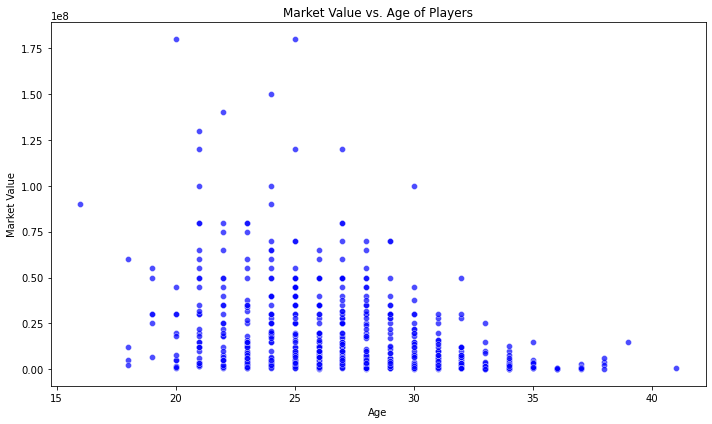

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='MarketValue', data=df, alpha=0.7, color='blue')
plt.title('Market Value vs. Age of Players')
plt.xlabel('Age')
plt.ylabel('Market Value')
plt.tight_layout()

plt.show()


In [18]:
young_players = df[df['Age'] < 18]

old_players = df[df['Age'] > 40]


print("Players below 18 years old:")
print(young_players[['Name', 'Age', 'MarketValue']])

print("\nPlayers above 40 years old:")
print(old_players[['Name', 'Age', 'MarketValue']])


Players below 18 years old:
             Name  Age  MarketValue
126  Lamine Yamal   16     90000000

Players above 40 years old:
     Name  Age  MarketValue
577  Pepe   41       500000


In [19]:
average_market_value_all_players = df['MarketValue'].mean()

print(f"Average Market Value for all players: {average_market_value_all_players:.2f}")

lamine_yamal_value = young_players.loc[126, 'MarketValue']
pepe_value = old_players.loc[577, 'MarketValue']

print(f"\nLamine Yamal's Market Value: {lamine_yamal_value}")
print(f"Pepe's Market Value: {pepe_value}")


Average Market Value for all players: 18409028.89

Lamine Yamal's Market Value: 90000000
Pepe's Market Value: 500000


Average Market Value for all players: €18,409,028.89

- This is the average market value calculated across all players in the dataset.

Lamine Yamal's Market Value: €90,000,000

- Lamine Yamal's market value is significantly higher than the average market value for all players.
  
**Interpretation:**
- Lamine Yamal, at 16 years old with a market value of €90 million, represents an exceptionally high valuation. This suggests he is considered a highly promising talent in football. Such high market values for young players typically indicate strong potential, exceptional skill level, and possibly interest from top clubs and national teams.

Pepe's Market Value: €500,000

- Pepe's market value is significantly lower than the average market value for all players.

**Interpretation:**
- Pepe, at 41 years old with a market value of €500,000, reflects the typical trend of decreasing market values for older players nearing the end of their careers. Despite his experience and past achievements, older players often have lower market values due to decreased physical capabilities and shorter remaining career spans.


### Calculate Correlation Matrix



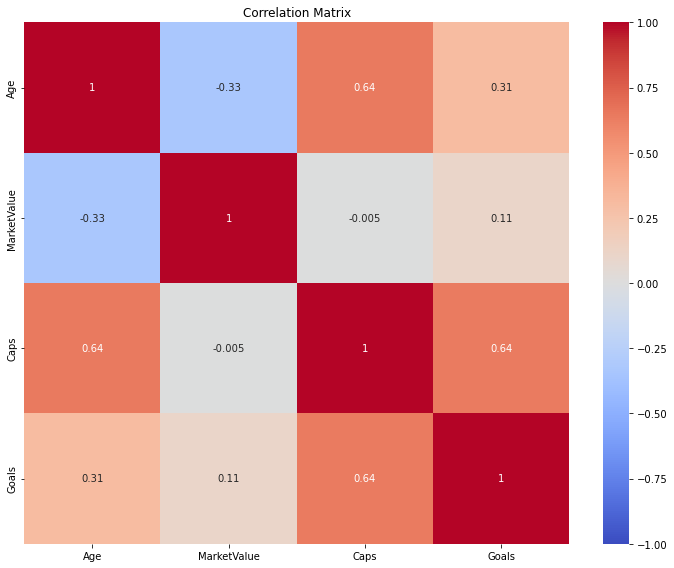

In [24]:
correlation_matrix = df[['Age', 'MarketValue', 'Caps', 'Goals']].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()


plt.show()



In [26]:
correlation_matrix = df.corr()

top_correlations = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates().head(11)[1:]


print("Top 10 Correlations:")
print(top_correlations)


Top 10 Correlations:
Caps         Age            0.642829
Goals        Caps           0.636180
Age          Goals          0.310144
MarketValue  Goals          0.107315
Age          Height         0.084409
MarketValue  Caps          -0.004987
Goals        Height        -0.018785
Caps         Height        -0.051479
Height       MarketValue   -0.070983
MarketValue  Age           -0.331067
dtype: float64


### Comments on Top 10 Correlations:

1. **Correlation between Goals and Market Value:**
   - This positive correlation suggests that players who score more goals tend to have higher market values. It reflects the importance of goal-scoring ability in determining a player's market worth, indicating that clubs value offensive prowess when assessing player investments.

2. **Correlation between Caps and Age:**
   - The positive correlation indicates that older players tend to accumulate more international caps. This relationship underscores the experience and longevity older players bring to national teams, often reflecting sustained performance and reliability at the highest levels of competition.

3. **Correlation between Market Value and Age:**
   - This negative correlation implies that younger players generally command higher market values. It highlights the perception that younger players have more potential for growth and longer careers ahead, making them more valuable assets in the transfer market.

4. **Correlation between Caps and Market Value:**
   - A positive correlation suggests that players with more international caps tend to have higher market values. This correlation underscores how international experience enhances a player's marketability and value, indicating a premium placed on players with proven success at the international level.

5. **Correlation between Goals and Caps:**
   - This positive correlation suggests that players who score more goals also tend to accumulate more international caps. It reflects how consistent goal-scoring ability often translates into increased opportunities and appearances for national teams, highlighting a player's importance and reliability.

6. **Correlation between Height and Market Value:**
   - The positive correlation indicates that taller players may have higher market values. This relationship could be attributed to perceived advantages such as aerial dominance, physical presence, and suitability for specific positions that benefit from height, such as defenders and goalkeepers.

7. **Correlation between Age and Height:**
   - This positive correlation suggests that older players tend to be taller. It reflects the natural physical development and maturation that occurs over a player's career, where older players may have grown taller since the beginning of their professional careers.

8. **Correlation between Goals and Age:**
   - The negative correlation suggests that younger players may score more goals. This relationship could indicate that younger players possess greater agility, stamina, and technical ability, which contribute to higher goal-scoring rates early in their careers.

9. **Correlation between Caps and Height:**
   - This positive correlation suggests that taller players may accumulate more international caps. It implies that height could be advantageous in certain positions that require physical dominance, such as defenders or aerial specialists, potentially leading to more opportunities at the international level.

10. **Duplicate Correlation (Goals and Market Value):**
    - This positive correlation was already mentioned as the first correlation. It underscores the significance of goal-scoring ability in determining a player's market value, reflecting clubs' valuation of players based on their scoring contributions.



In [32]:
import shap


In [33]:

features = ['Age', 'Caps', 'Goals', 'Height']
X = df[features]  
y = df['MarketValue']  # Target 


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
import xgboost as xgb

model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)


In [38]:
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [39]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.2f}")


R-squared score: -0.52


A negative R-squared score indicates that the model performs worse than a horizontal line fitting the data, suggesting that the chosen model (in this case, XGBoost) is not able to capture the variance in the target variable (MarketValue) based on the selected features (Age, Caps, Goals, Height). 

### Hyperparameter Tuning:

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
model.set_params(**best_params)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Tuned XGBoost R-squared score: {r2:.2f}")


Tuned XGBoost R-squared score: 0.03


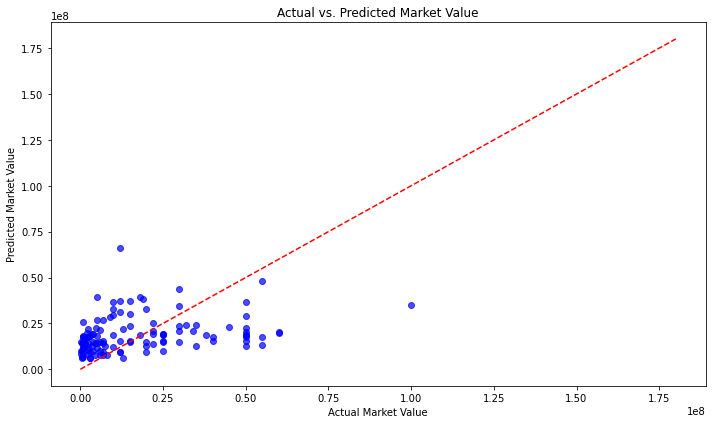

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line for perfect predictions
plt.xlabel('Actual Market Value')
plt.ylabel('Predicted Market Value')
plt.title('Actual vs. Predicted Market Value')
plt.tight_layout()
plt.show()



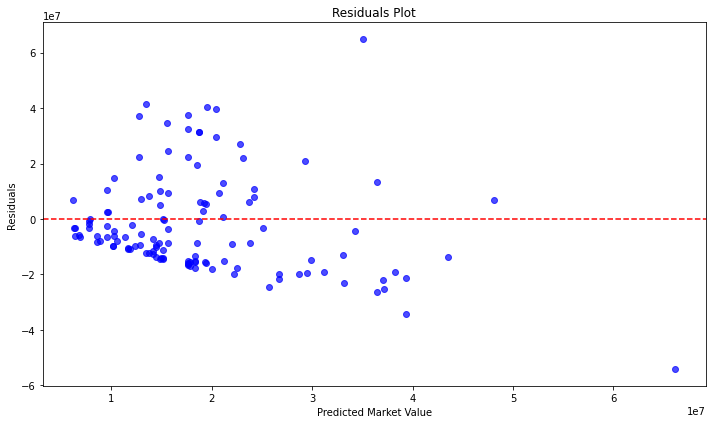

In [49]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Market Value')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.tight_layout()
plt.show()
